In [1]:
#if altair is not installed uncomment and run the following
#import sys
#!{sys.executable} -m pip install altair vega --upgrade

In [2]:
import pandas as pd

In [3]:
import altair as alt

In [4]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

1- Load the Gapminder dataset

In [5]:
data = pd.read_csv('./data/gapminder.tsv', delimiter='\t')

In [6]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


2- Relate per capita GDP to life expectancy using a scatter plot

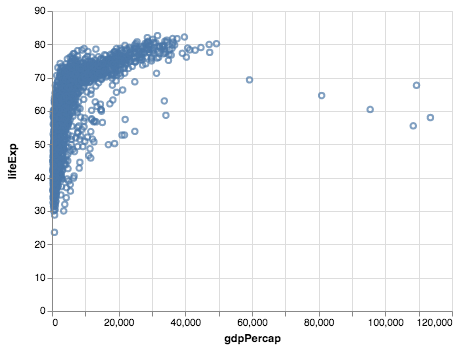

In [7]:
alt.Chart(data).mark_point().encode(
    x='gdpPercap',
    y='lifeExp'
)

In [ ]:
#interactive plot

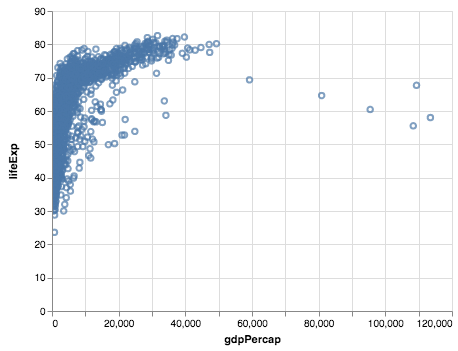

In [10]:
alt.Chart(data).mark_point().encode(
    x='gdpPercap',
    y='lifeExp'
).interactive()

2- Use color to differentiate between the different years

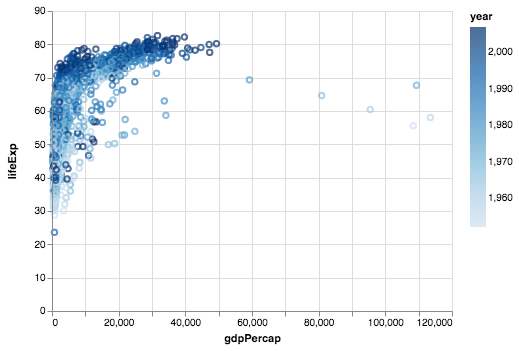

In [8]:
alt.Chart(data).mark_point().encode(
    x='gdpPercap',
    y='lifeExp',
    color="year",
    tooltip="country"
)

4- Can you account for population size? Try changing the size of the dots

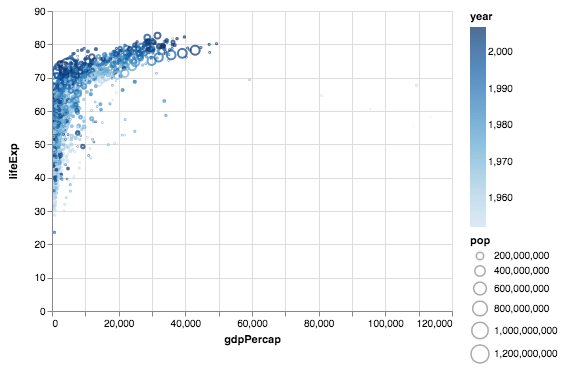

In [11]:
alt.Chart(data).mark_point().encode(
    x='gdpPercap',
    y='lifeExp',
    color="year",
    tooltip="country",
    size="pop"
).interactive()

5- Use facets to break this plot into one plot per year

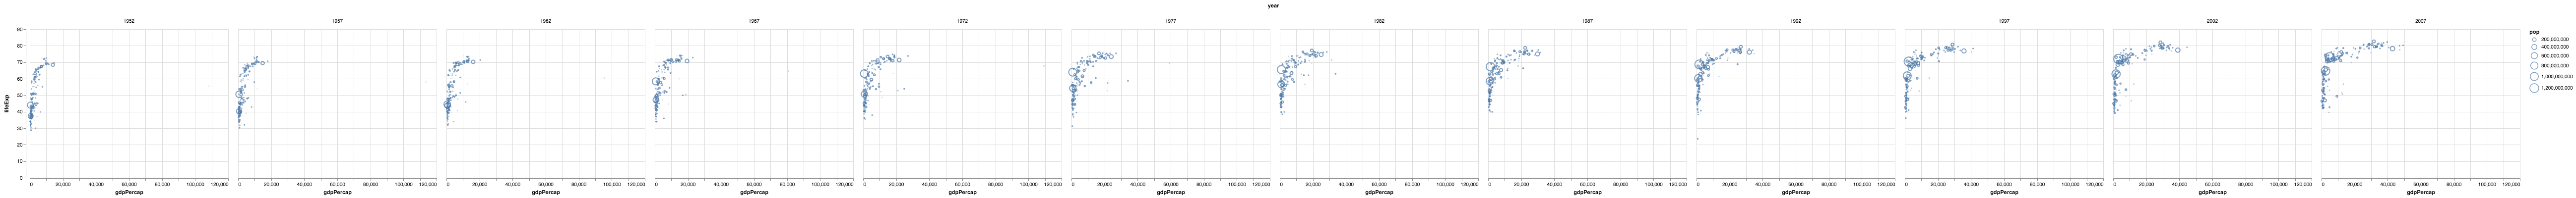

In [12]:
alt.Chart(data).mark_point().encode(
    x='gdpPercap',
    y='lifeExp',
    tooltip="country",
    size="pop"
).facet(
    column='year'
)


5- how does life expectancy vary per continent?

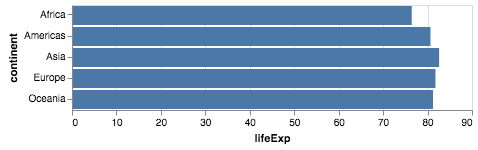

In [15]:
alt.Chart(data).mark_bar().encode(
    x='lifeExp',
    y="continent"
)

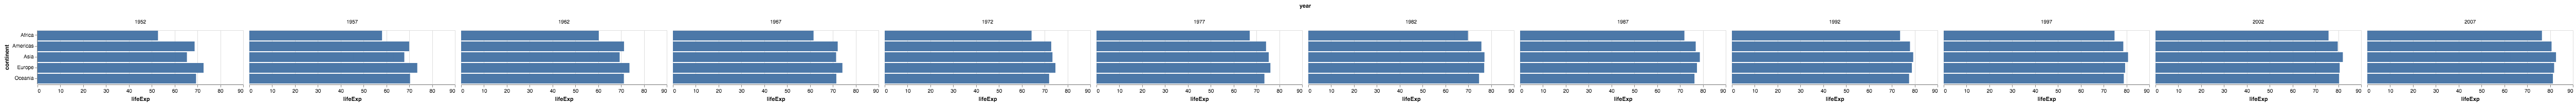

In [16]:
alt.Chart(data).mark_bar().encode(
    x='lifeExp',
    y="continent"
).facet(column="year")

6- how did life expectancy change over time?

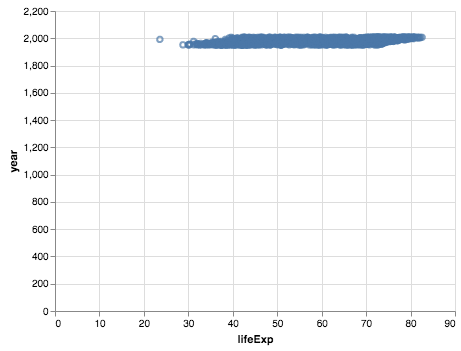

In [18]:
alt.Chart(data).mark_point().encode(
    x='lifeExp',
    y="year"
).interactive()

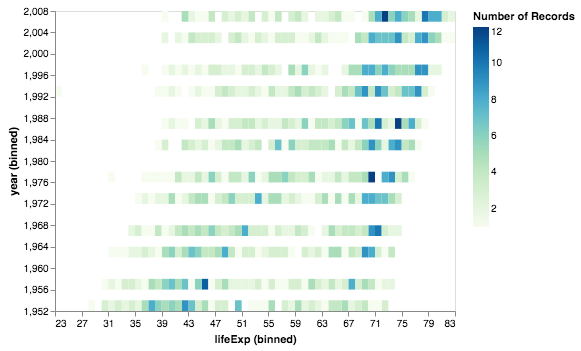

In [20]:
alt.Chart(data).mark_rect().encode(
    alt.X('lifeExp', bin=alt.Bin(maxbins=60)),
    alt.Y('year', bin=alt.Bin(maxbins=40)),
    alt.Color('count(lifeExp)', scale=alt.Scale(scheme='greenblue'))
)

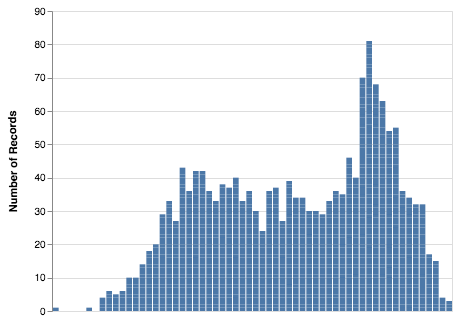

In [28]:
alt.Chart(data).mark_bar().encode(
    x=alt.X('lifeExp', bin=alt.Bin(maxbins=100), axis=None),
    y='count()',
    tooltip="lifeExp"
)

In [34]:
res=None
for year in set(data["year"]):
    subset = data[data.year==year]
    chart = alt.Chart(subset).mark_bar().encode(
        x=alt.X('lifeExp', bin=alt.Bin(maxbins=100), axis=None),
        y='count()',
        color="year",
        tooltip="lifeExp"
    )
    if res is None:
        res = chart
    else:
        res = res + chart

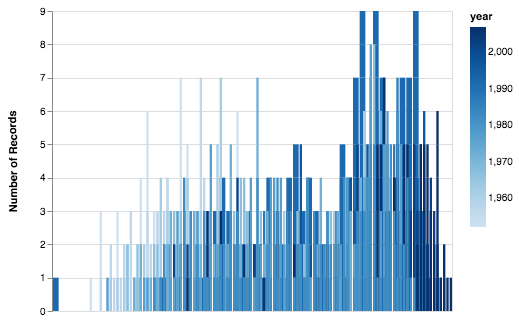

In [35]:
res